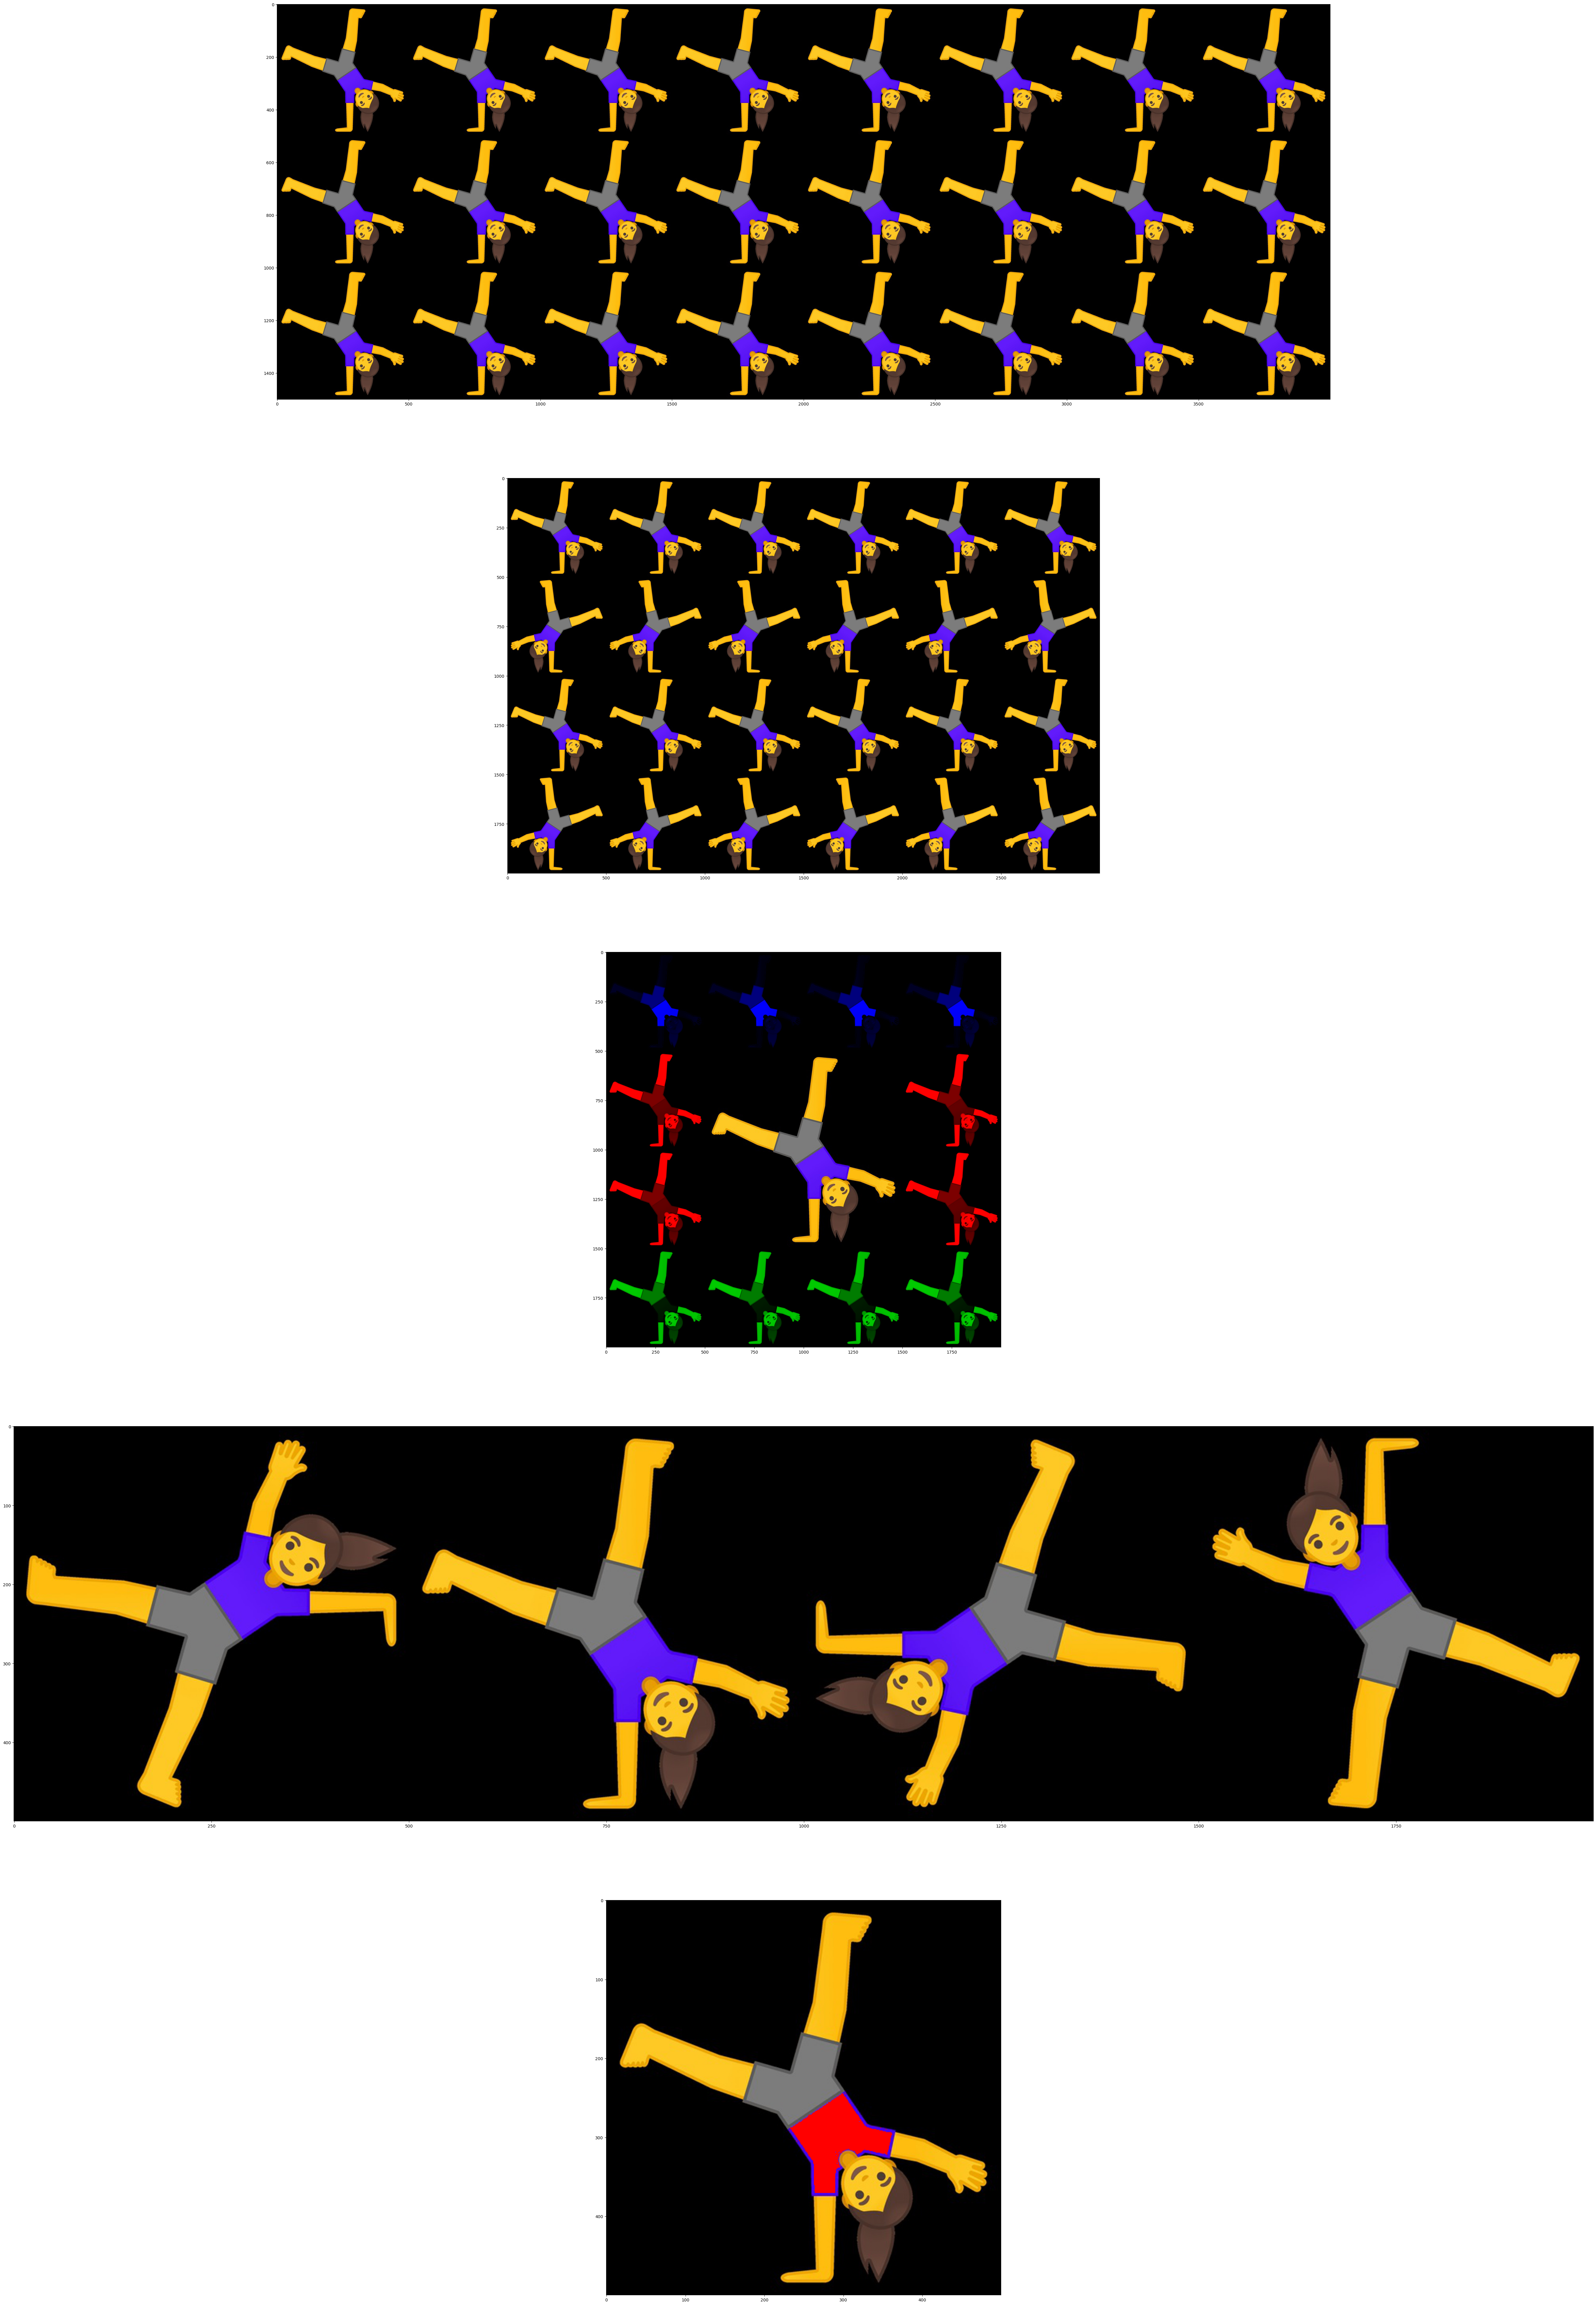

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# import the image and transform into an array
loc_input_img = os.path.join('..','data','input','radslag.jpg')
image = Image.open(loc_input_img)
np_image = np.array(image)

# duplicate the image so we get 3 lines of 8 times the image
np_image_tiled = np.tile(np_image,(3,8,1))



# create image of 4 horizontal line of 6 times the image alternately flipped
flipped_img = np_image[:,::-1]
basic_and_flipped_tiled_img = np.concatenate([np.tile(np_image,(1,6,1)),np.tile(flipped_img,(1,6,1))], axis = 0)
basic_and_flipped_tiled_img = np.concatenate([basic_and_flipped_tiled_img,basic_and_flipped_tiled_img],axis =0)



# create 4 blue images placed one next to the other
blue_image = np_image.copy()
blue_image[:, :, :2] = 0
blue_line = np.tile(blue_image,(1,4,1))


# create 2 red images placed one under the other
red_image = np_image.copy()
red_image[:, :, 1:3]=0
red_column = np.tile(red_image,(2,1,1))

# create a line of 4 green images
green_image = np_image.copy()
green_image[:, :, 0::2]=0
green_line = np.tile(green_image,(1,4,1))

# create an image twice the size surrounded by 2 red images normal size on both sides
big_image = np_image.copy()
big_image = big_image.repeat(2, axis = 1)
big_image = big_image.repeat(2, axis = 0)
big_line = np.concatenate([red_column,big_image,red_column],axis=1)


# make one combined image of the previous images
total_image = np.concatenate([blue_line,big_line], axis = 0)
total_image = np.concatenate([total_image,green_line], axis = 0)


# function to rotate image 90°
def rotate_image(image_to_rotate):
    rotated_image = image_to_rotate.copy()
    rows,columns = image_to_rotate.shape[:2]
    for i in range(rows):
        for j in range(columns):
            rotated_image[j,(rows-i-1)] = image_to_rotate[i,j]
    
    return(rotated_image)


# create three extra images that each turn 90° further tha,n the previous one.
# Show them next ot each other as if the image is performing a carthweel
image_1= rotate_image(np_image)
image_2= rotate_image(image_1)
image_3 = rotate_image(image_2)
rotating_image = np.concatenate([image_3,np_image],axis=1)
rotating_image = np.concatenate([rotating_image,image_1],axis=1)
rotating_image = np.concatenate([rotating_image,image_2],axis=1)


# change the color of the blue shirt in red
red_shirt = np_image.copy()
rows,columns = np_image.shape[:2]
for i in range(rows):
    for j in range(columns):
        if (red_shirt[i,j,0] > 75 and red_shirt[i,j,0] < 110) \
        and (red_shirt[i,j,1] > 5 and red_shirt[i,j,1] < 45) \
        and red_shirt[i,j,2] >225 :
            red_shirt[i,j] = [255,0,0]

# show the created images 
fig, ax = plt.subplots(5, 1, figsize=(100,100)) 
ax[0].imshow(np_image_tiled) 
ax[1].imshow(basic_and_flipped_tiled_img)
ax[2].imshow(total_image)
ax[3].imshow(rotating_image)
ax[4].imshow(red_shirt)


plt.show()